In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay , classification_report

In [2]:
irse= load_iris()

In [3]:
irse

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame( irse.data , columns=irse.feature_names )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
irse.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
irse.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df['target']=irse.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# df = df.drop(df['target'])

In [9]:
df[51:60]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [10]:
df['flower_name']=df.target.apply(lambda x : irse.target_names[x])

In [11]:
df1 = df[:50]
df2 = df[50:100]
df3 = df[100:150]

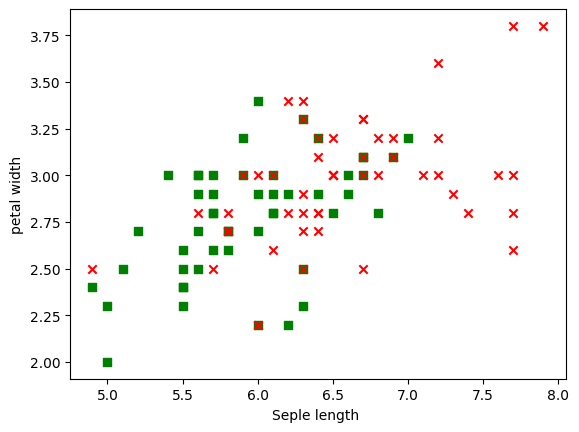

In [12]:
plt.xlabel('Seple length ')
plt.ylabel('petal width')
plt.scatter( df2['sepal length (cm)'] , df2['sepal width (cm)'] , color = 'green' , marker='s' )
# plt.scatter( df1['sepal length (cm)'] , df1['sepal width (cm)'] , color = 'purple' , marker='o' )
plt.scatter( df3['sepal length (cm)'] , df3['sepal width (cm)'] , color = 'red' , marker='x' )
plt.show()

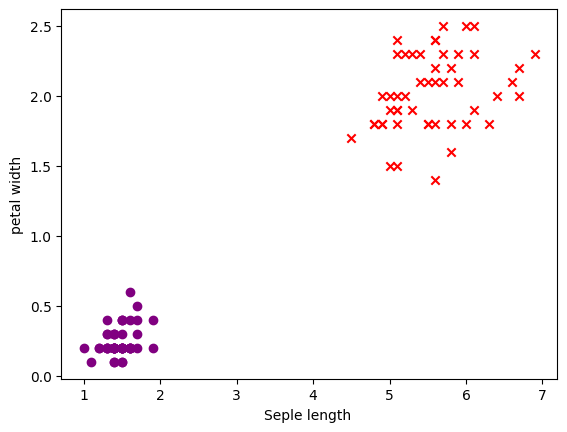

In [13]:
plt.xlabel('Seple length ')
plt.ylabel('petal width')
# plt.scatter( df2['petal length (cm)'] , df2['petal width (cm)'] , color = 'green' , marker='s' )
plt.scatter( df1['petal length (cm)'] , df1['petal width (cm)'] , color = 'purple' , marker='o' )
plt.scatter( df3['petal length (cm)'] , df3['petal width (cm)'] , color = 'red' , marker='x' )
plt.show()

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x = df.drop(['target','flower_name'] , axis='columns')
y = df.target

In [16]:
x_train , x_test , y_train , y_test = train_test_split( x,y,test_size=0.2 , random_state=42 )


In [17]:
len(x_test)

30

In [18]:
len(x_train)

120

In [19]:
model = LinearSVC()


In [20]:
model.fit(x_train,y_train)

LinearSVC()

In [21]:
model.score(x_test,y_test)

1.0

In [22]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\python 3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([0])

In [23]:
y_pre = model.predict(x_test)

In [24]:
y_pre

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [25]:
y_test.iloc[:]

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: target, dtype: int64

In [26]:
print(classification_report(y_test , y_pre , target_names=irse.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



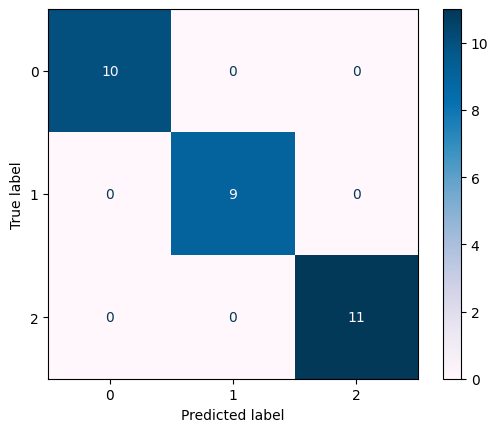

In [27]:
ConfusionMatrixDisplay.from_predictions(
    y_test , y_pre  , cmap='PuBu'
)

## Types of kernal 'sigmoid', 'poly', 'linear', 'rbf'

In [28]:
model = SVC(kernel='sigmoid')
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.3

In [29]:
y_pre = model.predict(x_test)

In [30]:
model = SVC(kernel='rbf')
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [31]:
model = SVC(kernel='linear')    
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [32]:
model = SVC(kernel='poly')
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

## Summary
##### 1. Loaded and visualized the Iris dataset.
##### 2. Trained SVM models using different kernels (linear, rbf, poly, sigmoid).
##### 3. Evaluated model accuracy and showed results with a confusion matrix.
